Hair Diseases with Handy carmera

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf

In [11]:
IMAGE_SIZE = [224, 224]

train_path = r'./Hair Diseases - Final/train'
test_path = r'./Hair Diseases - Final/test'
val_path = r'./Hair Diseases - Final/val'

In [12]:
rn = MobileNetV2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [13]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

get_available_gpus()

from tensorflow.python.client import device_lib

In [14]:
for layer in rn.layers:
    layer.trainable = False
    
folders = glob(train_path+'\*')

In [15]:
x = Flatten()(rn.output)

In [16]:
prediction = Dense(10, activation='softmax')(x)
model = Model(inputs=rn.input, outputs=prediction)

In [17]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(directory=train_path,
                target_size=(224, 224),
                batch_size=64,
                class_mode='categorical')
test_set = test_datagen.flow_from_directory(directory=test_path,
                target_size=(224, 224),
                batch_size=64,
                class_mode='categorical', shuffle=False)
val_set = val_datagen.flow_from_directory(directory=val_path,
                target_size=(224, 224),
                batch_size=64,
                class_mode='categorical', shuffle=False)

Found 9600 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.


In [19]:
import keras
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
  loss='categorical_crossentropy',
  optimizer=opt,
  metrics=["acc"]
)

In [20]:
import time 
print(time.ctime())
from time import time
t_start = time()

Mon Sep 18 04:36:45 2023


In [21]:
import keras
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

annealer = ReduceLROnPlateau(monitor='accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-4)
checkpoint = ModelCheckpoint('/temp/{epoch}_MobileNetV2.h5', verbose=1, save_best_only=False, mode='auto', save_freq='epoch')

In [22]:
history = model.fit(
                  training_set,
                  validation_data=val_set,
                  epochs=20,
                  batch_size=128,
                  callbacks=[annealer, checkpoint],
                  steps_per_epoch=len(training_set),
                  validation_steps=len(test_set)
                )

Epoch 1/20
150/150 [==============================] - 70s 446ms/step - loss: 1.2141 - acc: 0.8834 - val_loss: 0.1318 - val_acc: 0.9717

Epoch 00001: saving model to /temp/1_MobileNetV2.h5


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/20
150/150 [==============================] - 65s 436ms/step - loss: 0.0313 - acc: 0.9919 - val_loss: 0.0729 - val_acc: 0.9833

Epoch 00002: saving model to /temp/2_MobileNetV2.h5
Epoch 3/20
150/150 [==============================] - 66s 437ms/step - loss: 0.0207 - acc: 0.9940 - val_loss: 0.0946 - val_acc: 0.9858

Epoch 00003: saving model to /temp/3_MobileNetV2.h5
Epoch 4/20
150/150 [==============================] - 65s 434ms/step - loss: 0.0235 - acc: 0.9943 - val_loss: 0.0768 - val_acc: 0.9867

Epoch 00004: saving model to /temp/4_MobileNetV2.h5
Epoch 5/20
150/150 [==============================] - 65s 433ms/step - loss: 0.1889 - acc: 0.9752 - val_loss: 0.3165 - val_acc: 0.9658

Epoch 00005: saving model to /temp/5_MobileNetV2.h5
Epoch 6/20
150/150 [==============================] - 65s 431ms/step - loss: 0.1249 - acc: 0.9836 - val_loss: 0.2950 - val_acc: 0.9600

Epoch 00006: saving model to /temp/6_MobileNetV2.h5
Epoch 7/20
150/150 [==============================] - 65s 43

In [23]:
#time.ctime()
train_time = time() - t_start
print('\nTrain time: %.3f'%(train_time/60), ' mins')


Train time: 22.155  mins


In [24]:
model.save("MobileNetV2-Final.h5")
print("Model Saved as : MobileNetV2-Final.h5")

import json
np.save('my_history.npy',history.history)
import pandas as pd

# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# save to json:  
hist_json_file = 'history.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

Model Saved as : MobileNetV2-Final.h5


In [25]:
from time import time
start = time()
evl = model.evaluate(test_set)
test_time = time() - start

test_loss, test_acc = evl[0]*100, evl[1]*100

msg = f'Test Accuracy = {test_acc:5.2f} %'
msg1 = f'Test Loss = {test_loss:5.2f} %'
msg2 = f'Test Time = {test_time:5.2f} s'
print(msg)
print(msg1)
print(msg2)

19/19 [==============================] - 7s 349ms/step - loss: 0.4534 - acc: 0.9725
Test Accuracy = 97.25 %
Test Loss = 45.34 %
Test Time =  7.12 s


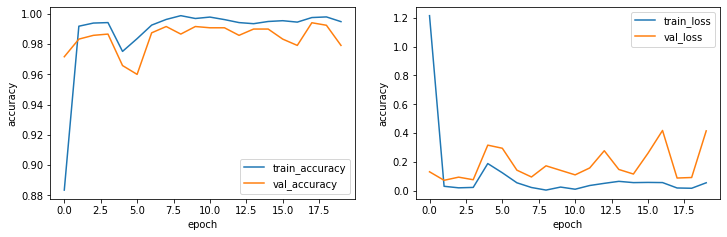

In [26]:
# Plotting Loss & Accuracy Graphs
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12, 12))
plt.subplot(3, 2, 1)
plt.plot(history.history['acc'], label = 'train_accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(3, 2, 2)
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [27]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(15, 15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

True :  [0 0 0 ... 9 9 9]
Predicted :  [0 0 0 ... 9 9 9]


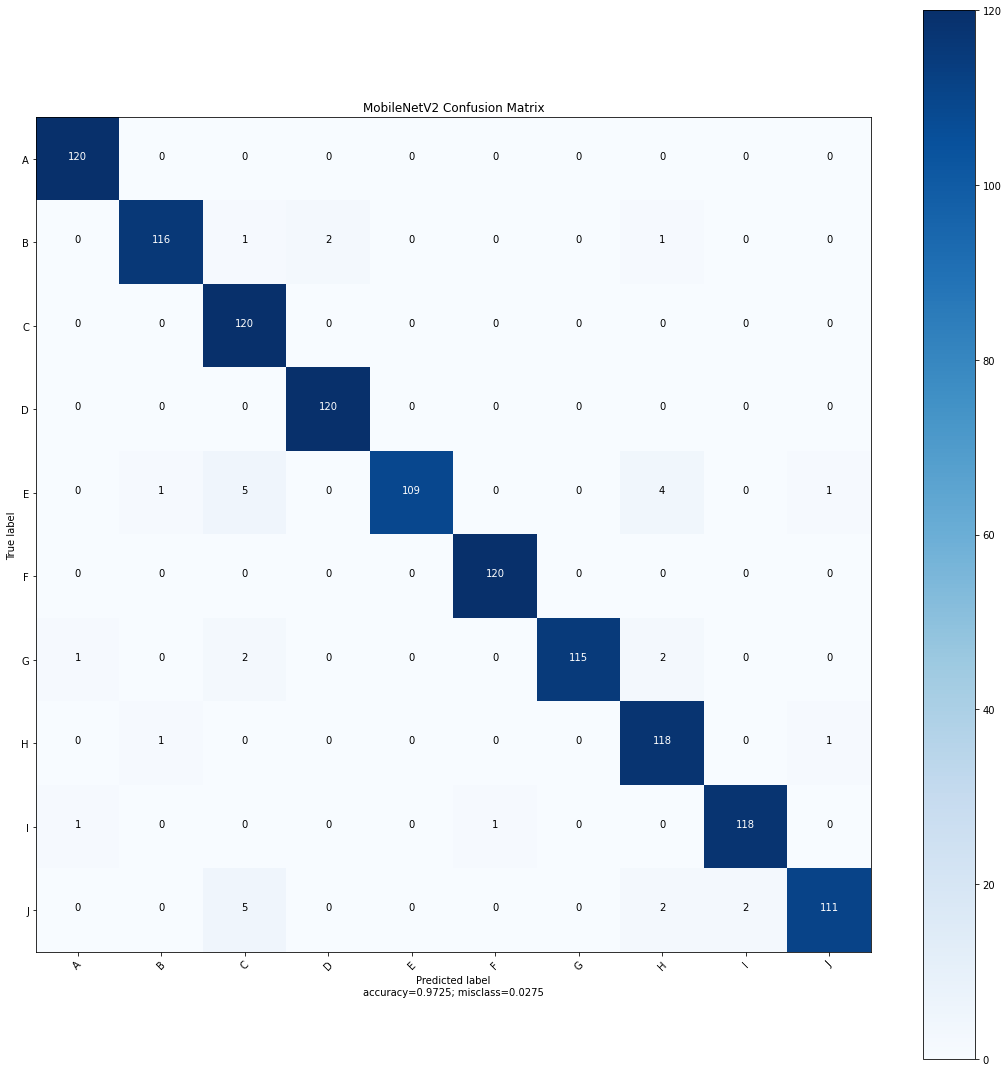

In [32]:
from sklearn.metrics import confusion_matrix

classes = ["A", "B", "C", "D", "E", "F", "G", "H", "I" ,"J"]

y_true = np.array(test_set.labels)
print("True : ", y_true)

y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
print("Predicted : ", y_pred)

conf_mat = confusion_matrix(y_true, y_pred)

plot_confusion_matrix(cm           = conf_mat,
                      normalize    = False,
                      target_names = classes,
                      title        = "MobileNetV2 Confusion Matrix")

In [34]:
# 저장된 모델 불러오기
model = tf.keras.models.load_model('MobileNetV2-Final.h5')

# TensorFlow Lite 변환
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# TFLite 모델 저장
with open('my_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpxawdhv34/assets


INFO:tensorflow:Assets written to: /tmp/tmpxawdhv34/assets
/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
